<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

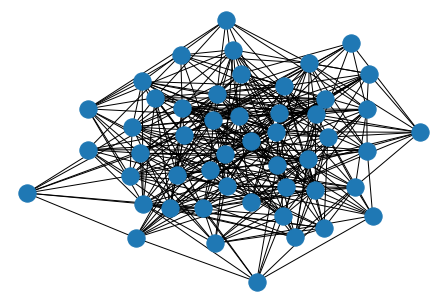

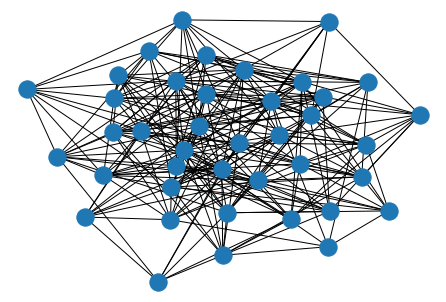

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
T  = K/5 #Number of test available
PAS = 0.7 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 1 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
[[0 1 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 11: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 12: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 13: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 14: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 15: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 16: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 17: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 18: [{'Viral_load':

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]

  Agent[k].append({'Symptom' : Symptom})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom]})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 9}, {'I': 0}, {'R': 0}, {948: [0, 0]}, {1559: [0, 0]}, {2261: [0, 0]}, {2554: [0, 0]}, {4954: [0, 1]}, {5937: [0, 1]}, {6645: [0, 1]}, {9035: [0, 1]}, {9222: [0, 1]}], 1: [{'Viral_load': 0}, {'S': 5}, {'I': 1}, {'R': 0}, {479: [0, 1]}, {1061: [0, 1]}, {1888: [1, 0], 'C': 0}, {5276: [0, 0]}, {9150: [0, 0]}, {9326: [0, 0]}], 2: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {1731: [0, 0]}, {2393: [0, 0]}, {3496: [0, 0]}], 3: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 0}, {2854: [0, 0]}, {8673: [0, 0]}], 4: [{'Viral_load': 0}, {'S': 9}, {'I': 0}, {'R': 0}, {1596: [0, 0]}, {2964: [0, 1]}, {3158: [0, 0]}, {3280: [0, 0]}, {3678: [0, 0]}, {4017: [0, 1]}, {4794: [0, 0]}, {8895: [0, 0]}, {9305: [0, 1]}], 5: [{'Viral_load': 0}, {'S': 4}, {'I': 0}, {'R': 0}, {2504: [0, 0]}, {6273: [0, 0]}, {6762: [0, 0]}, {6932: [0, 1]}], 6: [{'Viral_load': 0}, {'S': 4}, {'I': 0}, {'R': 0}, {4877: [0, 0]}, {7188: [0, 0]}, {8852: [0, 0]}, {9175: [0, 0]}], 7: [{'Viral_load': 0}, 

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:   #Time-steps of 4 to get cured(I -> R)
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160]
[218, 415, 761, 1193, 1616, 2143, 2652, 3230, 3644, 4082, 4223, 4022, 3538, 2708, 1906, 1215, 709, 429, 265, 162, 103, 57, 28, 14, 9, 6, 5, 4, 3, 0]
[0, 0, 0, 0, 218, 415, 761, 1193, 1834, 2558, 3413, 4423, 5478, 6640, 7636, 8445, 9016, 9348, 9542, 9660, 9725, 9777, 9807, 9822, 9828, 9834, 9835, 9836, 9837, 9840]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160]]
[[], [218, 415, 761, 1193, 1616, 2143, 2652, 3230, 3644, 4082, 4223, 4022, 3538, 2708, 1906, 1215, 709, 429, 265, 162, 103, 57, 28, 14, 9, 6, 5, 4, 3, 0]]
[[], [0, 0, 0, 0, 218, 415, 761, 1193, 1834, 25

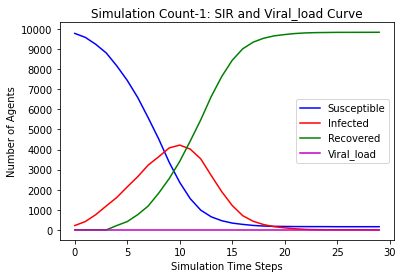

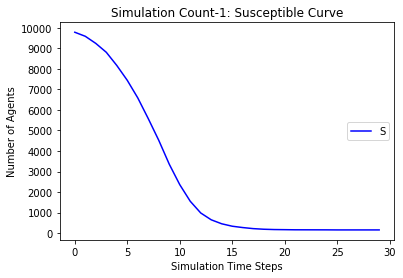

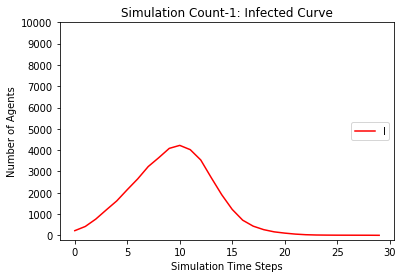

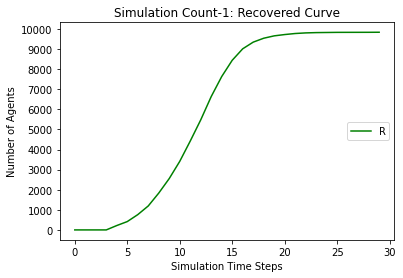

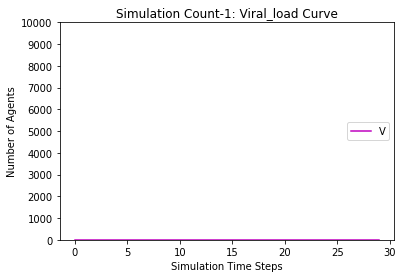

[9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161]
[218, 425, 791, 1281, 1710, 2284, 2842, 3413, 3878, 4158, 4130, 3761, 3152, 2414, 1729, 1167, 739, 467, 292, 189, 125, 82, 53, 27, 17, 9, 2, 1, 0]
[0, 0, 0, 0, 218, 425, 791, 1281, 1928, 2709, 3633, 4694, 5806, 6867, 7763, 8455, 8958, 9281, 9492, 9622, 9697, 9748, 9784, 9811, 9822, 9830, 9837, 9838, 9839]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161]]
[[], [218, 415, 761, 1193, 1616, 2143, 2652, 3230, 3644, 40

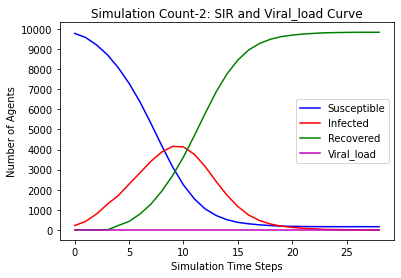

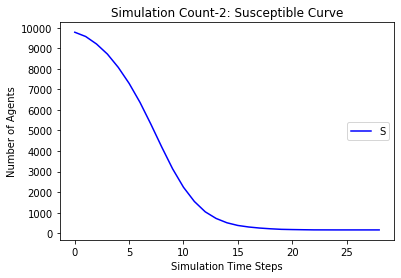

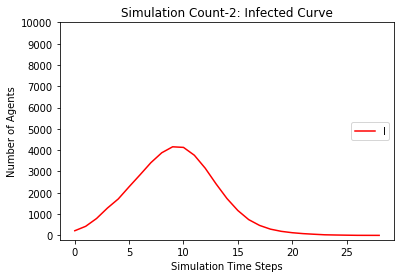

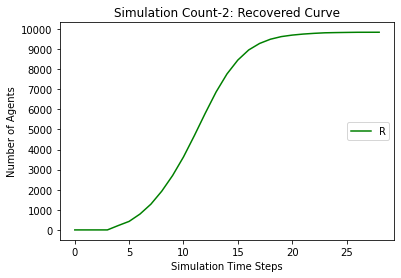

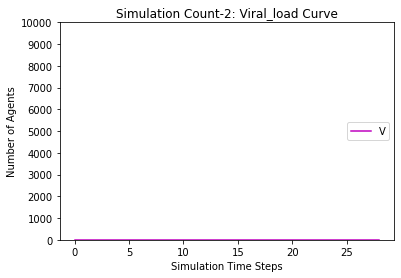

[9782, 9569, 9225, 8718, 8061, 7254, 6314, 5246, 4099, 3111, 2284, 1599, 1098, 767, 544, 400, 309, 261, 225, 200, 182, 171, 167, 164, 163, 159, 155, 155, 155, 155, 155]
[218, 431, 775, 1282, 1721, 2315, 2911, 3472, 3962, 4143, 4030, 3647, 3001, 2344, 1740, 1199, 789, 506, 319, 200, 127, 90, 58, 36, 19, 12, 12, 9, 8, 4, 0]
[0, 0, 0, 0, 218, 431, 775, 1282, 1939, 2746, 3686, 4754, 5901, 6889, 7716, 8401, 8902, 9233, 9456, 9600, 9691, 9739, 9775, 9800, 9818, 9829, 9833, 9836, 9837, 9841, 9845]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161], [9782, 9569, 9225, 

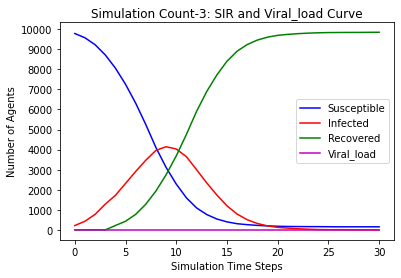

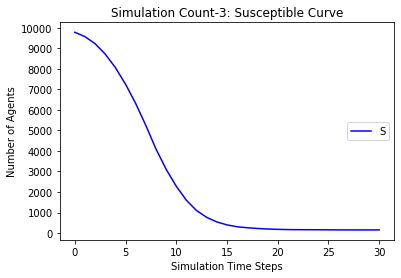

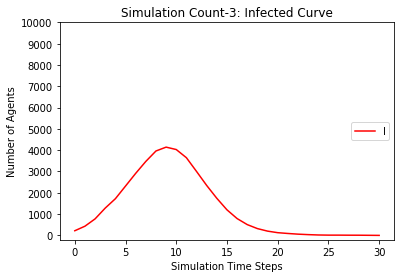

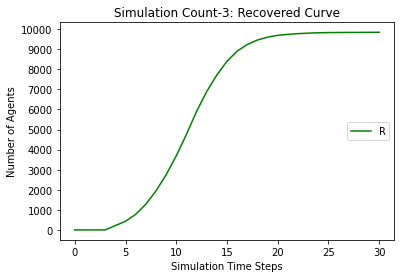

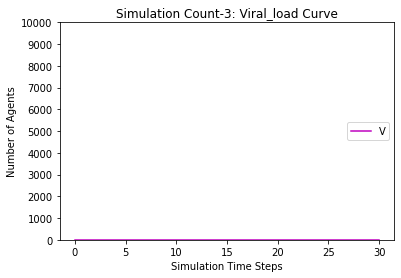

[9782, 9559, 9192, 8705, 8059, 7271, 6339, 5270, 4083, 2975, 2075, 1390, 924, 624, 435, 292, 230, 196, 172, 157, 150, 145, 143, 142, 139, 138, 137, 137, 137, 137, 137]
[218, 441, 808, 1295, 1723, 2288, 2853, 3435, 3976, 4296, 4264, 3880, 3159, 2351, 1640, 1098, 694, 428, 263, 135, 80, 51, 29, 15, 11, 7, 6, 5, 2, 1, 0]
[0, 0, 0, 0, 218, 441, 808, 1295, 1941, 2729, 3661, 4730, 5917, 7025, 7925, 8610, 9076, 9376, 9565, 9708, 9770, 9804, 9828, 9843, 9850, 9855, 9857, 9858, 9861, 9862, 9863]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161], [9782, 9569, 9225, 8718

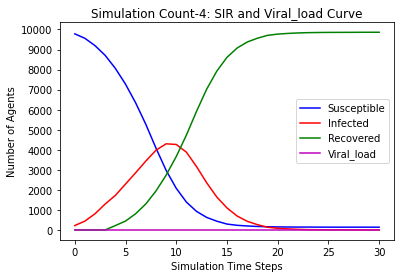

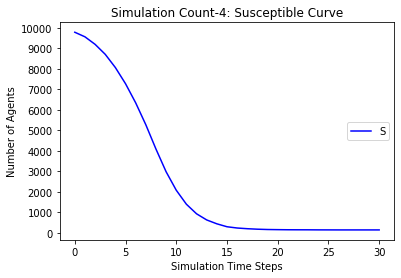

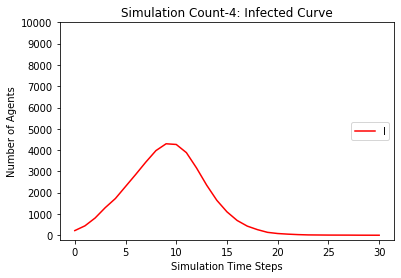

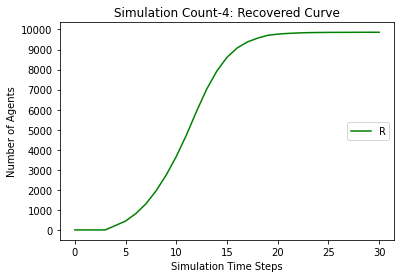

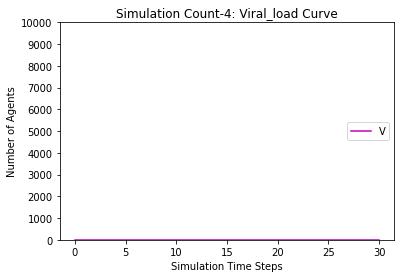

[9782, 9572, 9220, 8722, 8025, 7271, 6352, 5336, 4243, 3196, 2286, 1556, 1025, 681, 479, 353, 262, 218, 196, 181, 171, 168, 166, 165, 165, 165, 165, 164, 164, 164, 164, 164]
[218, 428, 780, 1278, 1757, 2301, 2868, 3386, 3782, 4075, 4066, 3780, 3218, 2515, 1807, 1203, 763, 463, 283, 172, 91, 50, 30, 16, 6, 3, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 218, 428, 780, 1278, 1975, 2729, 3648, 4664, 5757, 6804, 7714, 8444, 8975, 9319, 9521, 9647, 9738, 9782, 9804, 9819, 9829, 9832, 9834, 9835, 9835, 9835, 9835, 9836]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161], [978

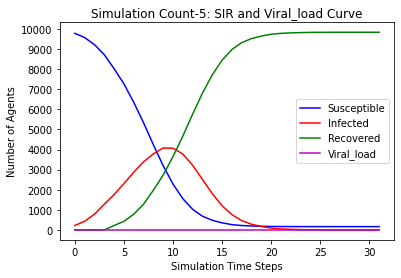

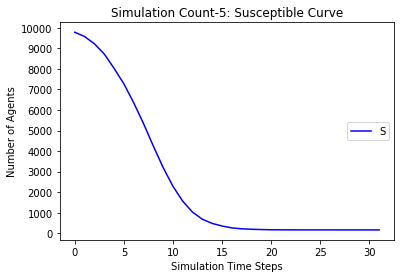

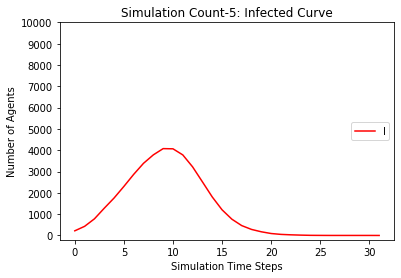

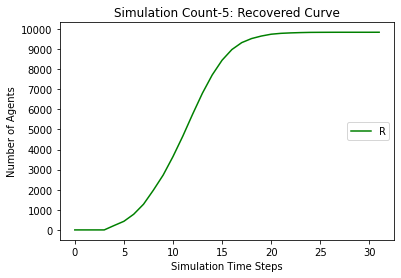

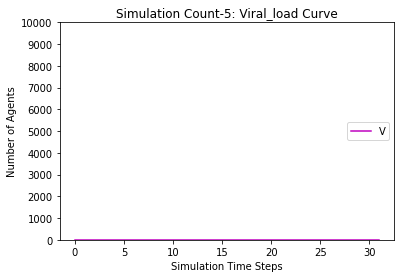

[9782, 9577, 9222, 8739, 8061, 7328, 6398, 5313, 4244, 3195, 2285, 1575, 1075, 724, 503, 360, 284, 236, 201, 187, 175, 165, 160, 154, 152, 152, 152, 151, 151, 151, 151, 151]
[218, 423, 778, 1261, 1721, 2249, 2824, 3426, 3817, 4133, 4113, 3738, 3169, 2471, 1782, 1215, 791, 488, 302, 173, 109, 71, 41, 33, 23, 13, 8, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 218, 423, 778, 1261, 1939, 2672, 3602, 4687, 5756, 6805, 7715, 8425, 8925, 9276, 9497, 9640, 9716, 9764, 9799, 9813, 9825, 9835, 9840, 9846, 9848, 9848, 9848, 9849]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161], [

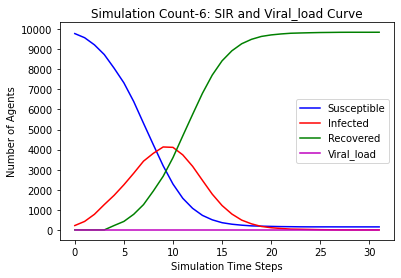

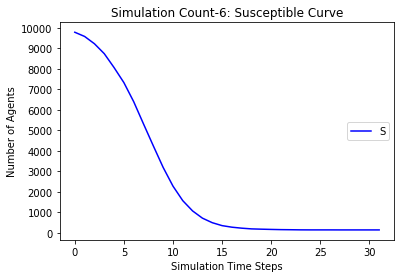

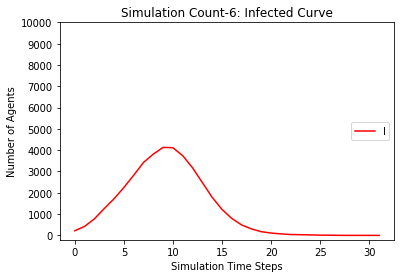

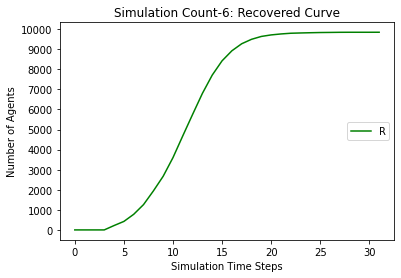

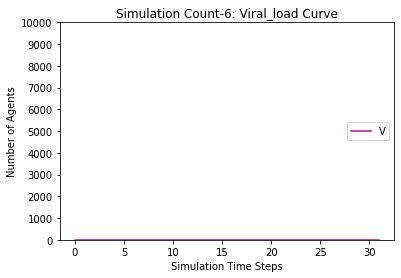

[9782, 9575, 9231, 8735, 8098, 7330, 6397, 5347, 4286, 3252, 2283, 1521, 1017, 648, 427, 301, 239, 196, 172, 161, 158, 153, 149, 146, 145, 145, 145, 145, 145]
[218, 425, 769, 1265, 1684, 2245, 2834, 3388, 3812, 4078, 4114, 3826, 3269, 2604, 1856, 1220, 778, 452, 255, 140, 81, 43, 23, 15, 13, 8, 4, 1, 0]
[0, 0, 0, 0, 218, 425, 769, 1265, 1902, 2670, 3603, 4653, 5714, 6748, 7717, 8479, 8983, 9352, 9573, 9699, 9761, 9804, 9828, 9839, 9842, 9847, 9851, 9854, 9855]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161], [9782, 9569, 9225, 8718, 8061, 7254, 6314, 5246, 4099, 3111,

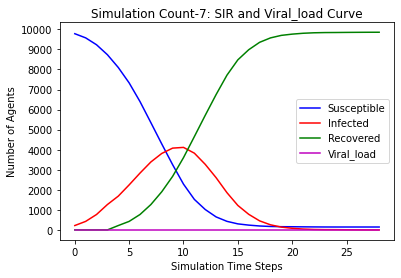

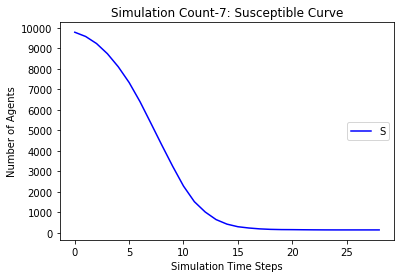

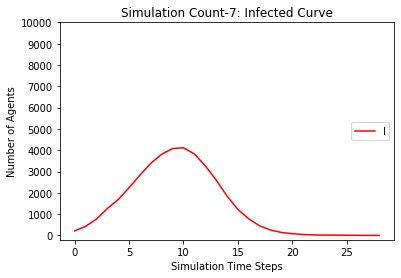

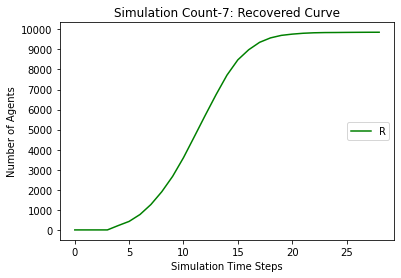

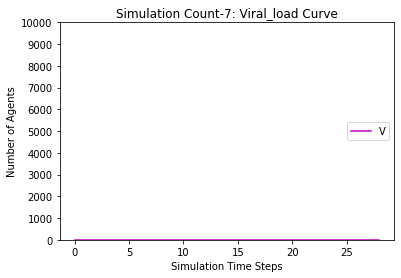

[9782, 9559, 9193, 8695, 8000, 7247, 6297, 5227, 4107, 3045, 2124, 1461, 985, 678, 486, 372, 293, 250, 219, 194, 181, 167, 157, 155, 149, 146, 145, 143, 142, 142, 142, 142, 142]
[218, 441, 807, 1305, 1782, 2312, 2896, 3468, 3893, 4202, 4173, 3766, 3122, 2367, 1638, 1089, 692, 428, 267, 178, 112, 83, 62, 39, 32, 21, 12, 12, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 218, 441, 807, 1305, 2000, 2753, 3703, 4773, 5893, 6955, 7876, 8539, 9015, 9322, 9514, 9628, 9707, 9750, 9781, 9806, 9819, 9833, 9843, 9845, 9851, 9854, 9855, 9857, 9858]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 16

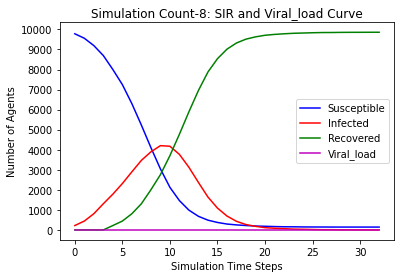

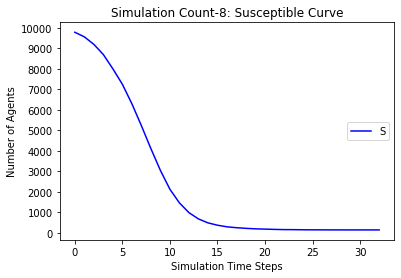

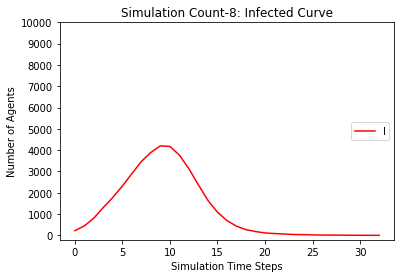

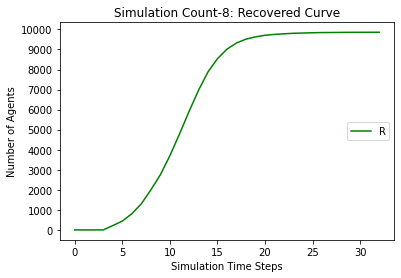

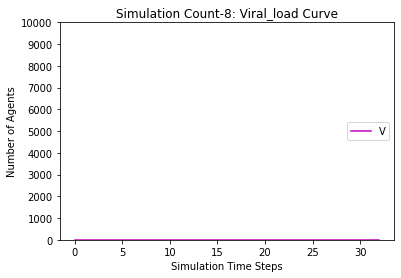

[9782, 9551, 9205, 8690, 7998, 7181, 6227, 5139, 4004, 2986, 2132, 1490, 999, 675, 452, 331, 258, 209, 179, 160, 152, 146, 144, 142, 136, 133, 133, 133, 133, 133]
[218, 449, 795, 1310, 1784, 2370, 2978, 3551, 3994, 4195, 4095, 3649, 3005, 2311, 1680, 1159, 741, 466, 273, 171, 106, 63, 35, 18, 16, 13, 11, 9, 3, 0]
[0, 0, 0, 0, 218, 449, 795, 1310, 2002, 2819, 3773, 4861, 5996, 7014, 7868, 8510, 9001, 9325, 9548, 9669, 9742, 9791, 9821, 9840, 9848, 9854, 9856, 9858, 9864, 9867]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161], [9782, 9569, 9225, 8718, 8061, 7254, 63

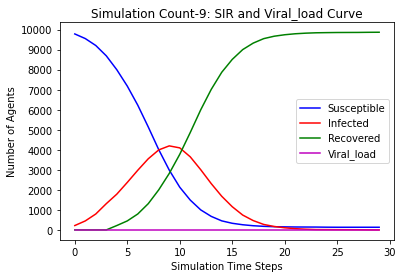

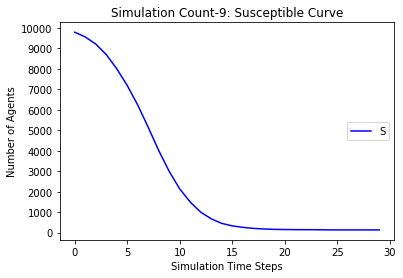

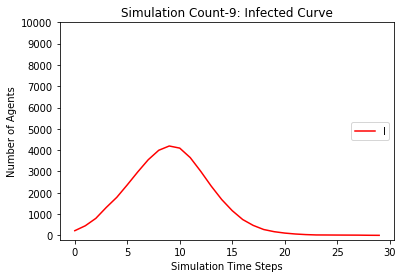

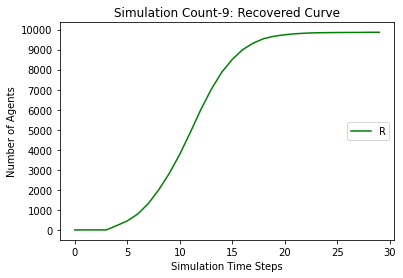

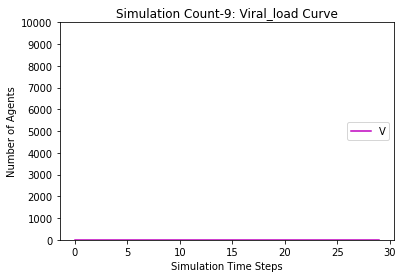

[9782, 9570, 9216, 8728, 8061, 7301, 6328, 5278, 4091, 3018, 2113, 1426, 948, 630, 426, 310, 235, 206, 186, 170, 163, 158, 156, 155, 154, 154, 154, 154, 154]
[218, 430, 784, 1272, 1721, 2269, 2888, 3450, 3970, 4283, 4215, 3852, 3143, 2388, 1687, 1116, 713, 424, 240, 140, 72, 48, 30, 15, 9, 4, 2, 1, 0]
[0, 0, 0, 0, 218, 430, 784, 1272, 1939, 2699, 3672, 4722, 5909, 6982, 7887, 8574, 9052, 9370, 9574, 9690, 9765, 9794, 9814, 9830, 9837, 9842, 9844, 9845, 9846]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9782, 9585, 9239, 8807, 8166, 7442, 6587, 5577, 4522, 3360, 2364, 1555, 984, 652, 458, 340, 275, 223, 193, 178, 172, 166, 165, 164, 163, 160, 160, 160, 160, 160], [9782, 9575, 9209, 8719, 8072, 7291, 6367, 5306, 4194, 3133, 2237, 1545, 1042, 719, 508, 378, 303, 252, 216, 189, 178, 170, 163, 162, 161, 161, 161, 161, 161], [9782, 9569, 9225, 8718, 8061, 7254, 6314, 5246, 4099, 3111, 2

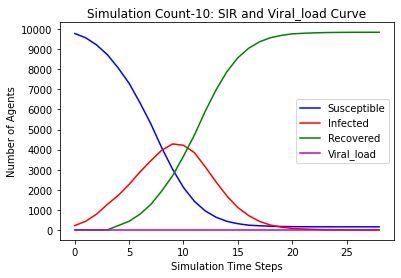

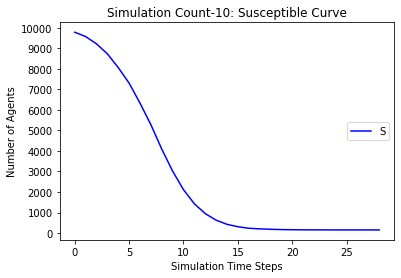

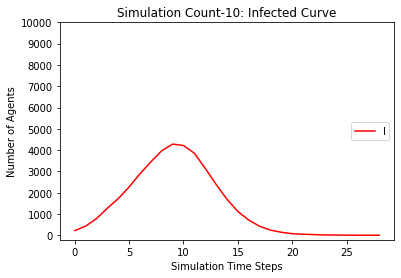

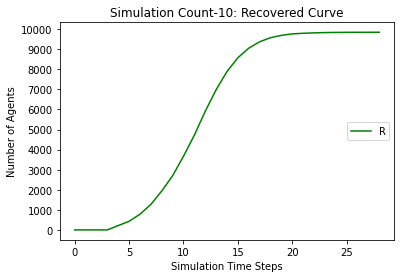

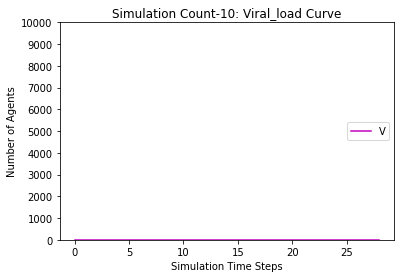

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

Susceptible Average (100 Simulations): [9782, 9558.7734375, 9206.8828125, 8701.9609375, 8018.171875, 7231.55078125, 6284.7265625, 5209.27734375, 4092.2109375, 3056.46484375, 2164.86328125, 1493.7578125, 1003.0234375, 675.62890625, 462.1015625, 340.1484375, 266.328125, 220.01953125, 190.48046875, 171.41796875, 162.4140625, 154.3515625, 149.8828125, 147.5546875, 142.7421875, 140.43359375, 140.13671875, 139.54296875, 139.29296875]
Infected Average(100 Simulations): [218, 441.2265625, 793.1171875, 1298.0390625, 1763.828125, 2327.22265625, 2922.15625, 3492.68359375, 3925.9609375, 4175.0859375, 4119.86328125, 3715.51953125, 3089.1875, 2380.8359375, 1702.76171875, 1153.609375, 736.6953125, 455.609375, 271.62109375, 168.73046875, 103.9140625, 65.66796875, 40.59765625, 23.86328125, 19.671875, 13.91796875, 9.74609375, 8.01171875, 3.44921875]
Recovered Average(100 Simulations): [0, 0, 0, 0, 218, 441.2265625, 793.1171875, 1298.0390625, 1981.828125, 2768.44921875, 3715.2734375, 4790.72265625, 5907.

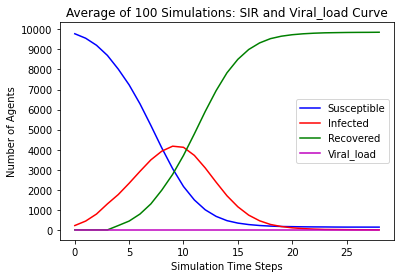

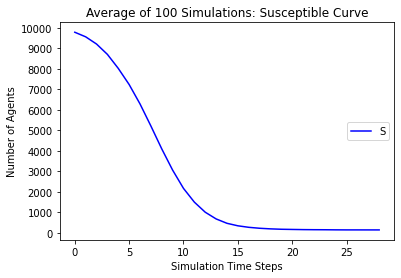

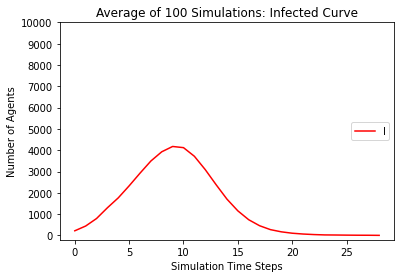

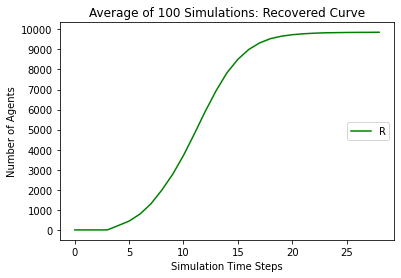

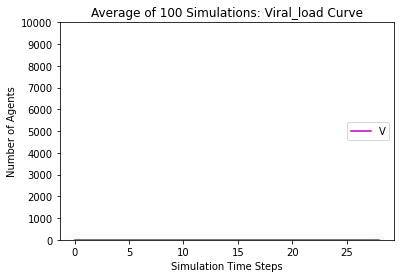

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
